#importing dependendcies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Data collection & Analysis

#loading the data from csv file to a pandas DataFrame

In [2]:
insurance_dataset = pd.read_csv("https://raw.githubusercontent.com/theshreyansh/Insurance-Data-Analysis/refs/heads/master/insurance.csv")

In [3]:
#first 5 rows of the datafram

In [4]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# number of rows and colums

In [6]:
insurance_dataset.shape

(1338, 7)

In [7]:
# getting some informations about the dataset

In [8]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# categorical Features:
# .sex
# .smoker
# .region

In [10]:
#checking for missing values

In [11]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#data Analysis mesures of the dataset

In [13]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
# distribution of age value
import warnings
warnings.filterwarnings("ignore")

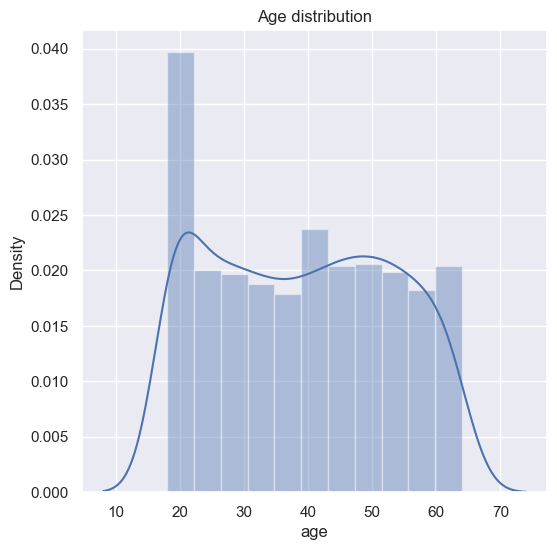

In [15]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age distribution')
plt.show()

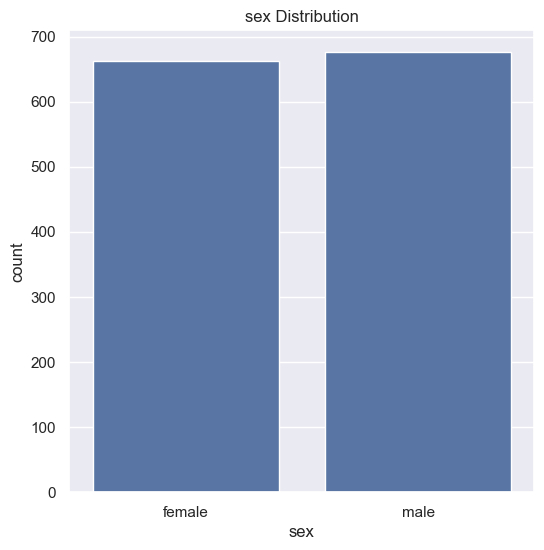

In [16]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('sex Distribution')
plt.show()

In [17]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [18]:
#bmi distribution

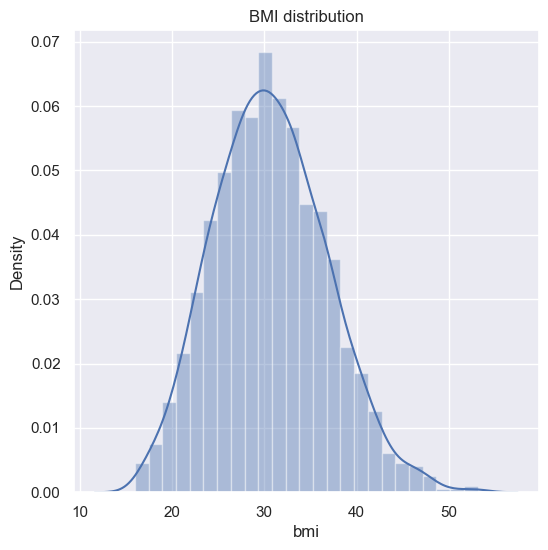

In [19]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')
plt.show()

In [20]:
#normal BMI range -->18.5 to 24.9

In [21]:
#children column

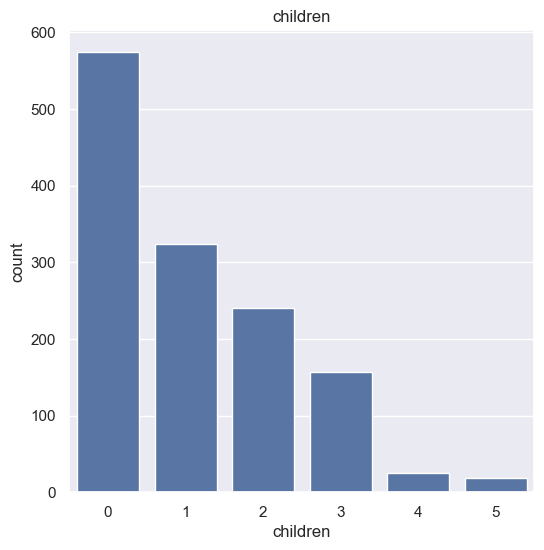

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

In [23]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [24]:
#smoker cloumns

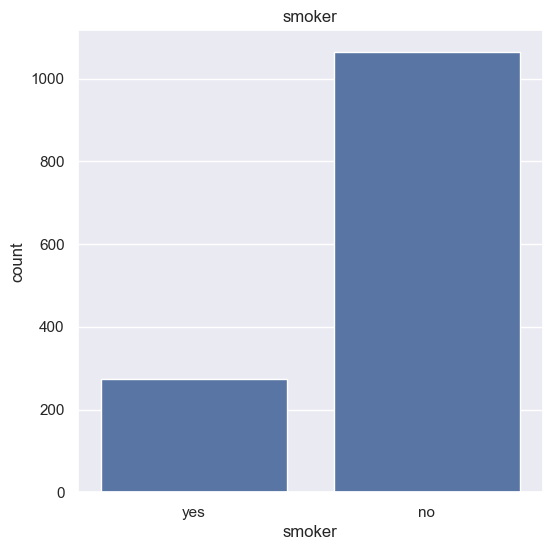

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [26]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [27]:
# region cloumns

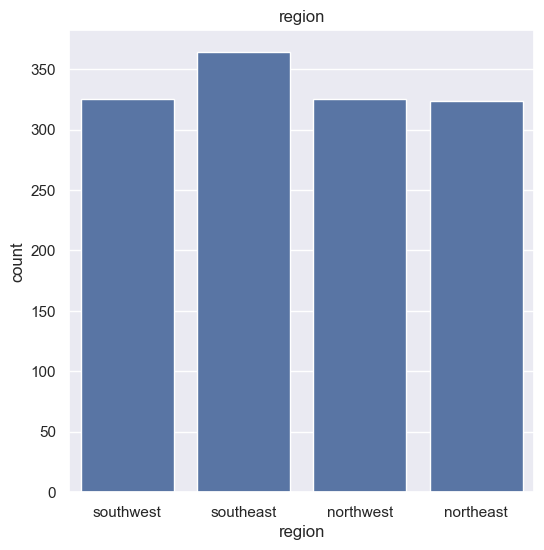

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [29]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [30]:
# charges cloumns

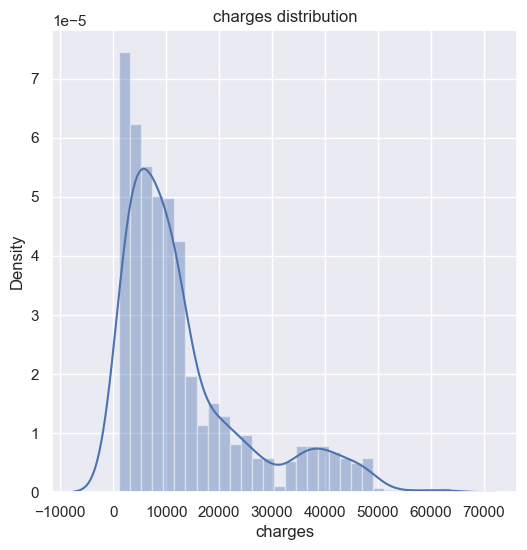

In [31]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges distribution')
plt.show()

In [32]:
#Data pre-procesing

In [33]:
#encoding the categorical features

In [34]:
# encoding sex columns

In [35]:
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
# region region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [36]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [37]:
#splitting the Feature and Target

In [38]:
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [39]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [40]:
#spliting data into training data & Testing Data

In [41]:
X_train, X_test, y_train, y_test = train_test_split( X, y,random_state=42,test_size=0.2)

In [42]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [43]:
#model Training
#linear Regression

In [44]:
# loading the linear Regression model

In [45]:
regressor = LinearRegression()

In [46]:
regressor.fit(X_train,y_train)

LinearRegression()

In [47]:
#model Evalution

In [48]:
# prediction on taining data

In [49]:
training_data_prediction = regressor.predict(X_train)

In [50]:
# R squared value 

In [51]:
r2_train = metrics.r2_score(y_train,training_data_prediction)

In [52]:
print('R squared value:',r2_train)

R squared value: 0.7413131194887537


In [53]:
#prediction on test data

In [54]:
test_data_prediction = regressor.predict(X_test)

In [55]:
#R squared value

In [56]:
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7830215871623442


In [57]:
#building Predictive system

In [58]:
import pickle
f1=open("model_insurance.pk1","wb")
#wb is write a binary file
pickle.dump(regressor,f1)
f1.close()

In [59]:
input_features = [[1.2, 3.4, 5.6, 7.8, 9.0]] 


In [60]:
input_features

[[1.2, 3.4, 5.6, 7.8, 9.0]]